Saving лимон.jpg to лимон.jpg


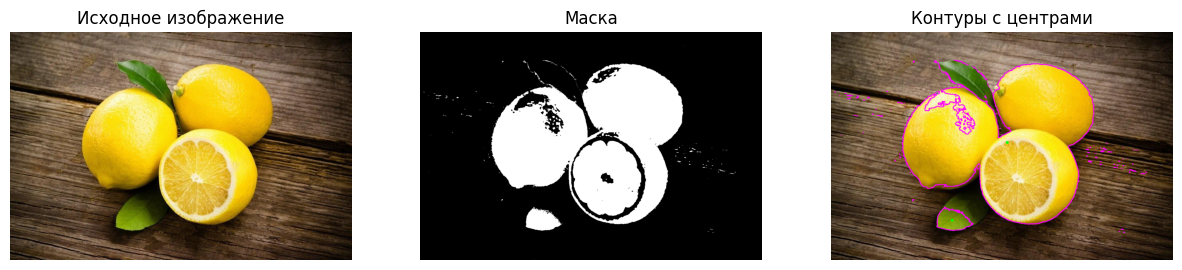

In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

uploaded = files.upload()
image_path = next(iter(uploaded))

frame = cv2.imread(image_path)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame_HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

low_yellow = np.array([20, 110, 110])
high_yellow = np.array([40, 255, 255])

mask = cv2.inRange(frame_HSV, low_yellow, high_yellow)
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

count = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:
        count += 1

        M = cv2.moments(contour)

        if M['m00'] != 0:

            center_x = int(M['m10'] / M['m00'])
            center_y = int(M['m01'] / M['m00'])


            cv2.circle(frame, (center_x, center_y), 5, (0, 255, 0), -1)


cv2.drawContours(frame, contours, -1, (255, 0, 255), 2)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Исходное изображение')
plt.imshow(frame_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Маска')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Контуры с центрами')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

